### INTRODUCTION: The FIFA World Cup

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. 

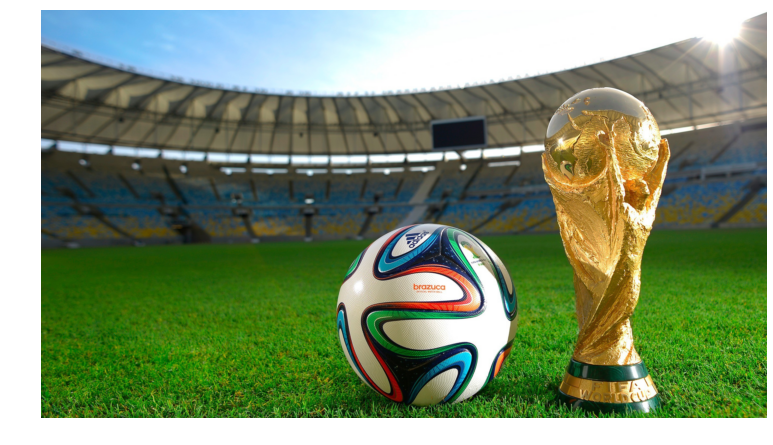

In [37]:
from PIL import Image
img = np.array(Image.open(r"Fifa-World-Cup.jpg"))
plt.figure(figsize=(13,10))
plt.imshow(img,interpolation="bilinear",cmap="Set1")
plt.axis("off")
plt.show()

### The Challenge
    -How many matches were played each world cup year from 1930.
    -Total goals scored for each tournament year.
    -All teams who have reached finals and how many times.
    -All teams who have reached semis and how many times.
    -How many goals and average goals scored in all semi-finals.
    -How many goals and average goals scored in all quarter-finals.
    -How many goals and average number scored in all finals
    -How many matches were played outside quarter-finals and above.
The #kicker:
    
    -Two new columns for each of the outcome of every match stating:
    - a. outcome = D for Draw, A for AwayTeam Wins, H for HomeTeam wins.
    -b. Winner of each game: 'Draw' if no winner.

### Importing necessary libraries

In [5]:
#Linear algebra
import numpy as np
#Data processing
import pandas as pd
#Data visualisation
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

### Getting the data

Using pandas, we now load the dataset. Basically this is just a dataset with FIFA world cup statistics from 1930 to 2014.

In [6]:
#Load the dataset using pandas's read csv method
world_cup = pd.read_csv("world_cup_results.csv")
world_cup.head(8)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,
5,1930,16-Jul-30,14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,
6,1930,17-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,
7,1930,17-Jul-30,14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,


### Data Exploration

Getting statistical info

In [7]:
#Using info method we can get a quick overview of the dataset
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         852 non-null    int64 
 1   Date         852 non-null    object
 2   Time         852 non-null    object
 3   Round        852 non-null    object
 4   Stadium      852 non-null    object
 5   City         852 non-null    object
 6   HomeTeam     852 non-null    object
 7   HomeGoals    852 non-null    int64 
 8   AwayGoals    852 non-null    int64 
 9   AwayTeam     852 non-null    object
 10  Observation  852 non-null    object
dtypes: int64(3), object(8)
memory usage: 73.3+ KB


In [8]:
#Dropping duplicates in the data
matches = world_cup.drop_duplicates()
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         836 non-null    int64 
 1   Date         836 non-null    object
 2   Time         836 non-null    object
 3   Round        836 non-null    object
 4   Stadium      836 non-null    object
 5   City         836 non-null    object
 6   HomeTeam     836 non-null    object
 7   HomeGoals    836 non-null    int64 
 8   AwayGoals    836 non-null    int64 
 9   AwayTeam     836 non-null    object
 10  Observation  836 non-null    object
dtypes: int64(3), object(8)
memory usage: 78.4+ KB


In [9]:
matches.columns

Index(['Year', 'Date', 'Time', 'Round', 'Stadium', 'City', 'HomeTeam',
       'HomeGoals', 'AwayGoals', 'AwayTeam', 'Observation'],
      dtype='object')

In [10]:
matches.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            826, 827, 828, 829, 830, 831, 832, 833, 834, 835],
           dtype='int64', length=836)

### 1. How many matches were played each world cup year from 1930

In [11]:
matches_played = matches["Year"].value_counts()
print(matches_played)

2014    64
2010    64
2006    64
2002    64
1998    64
1994    52
1990    52
1986    52
1982    52
1974    38
1978    38
1958    35
1970    32
1966    32
1962    32
1954    26
1950    22
1938    18
1930    18
1934    17
Name: Year, dtype: int64


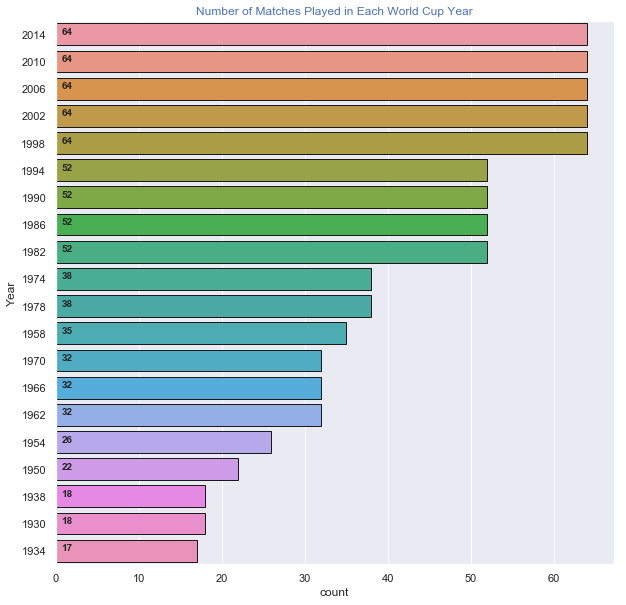

In [12]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y = matches["Year"],
                   order=matches["Year"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*matches["Year"].nunique()
                 )
for i,j in enumerate(matches_played):
    ax.text(0.7,i,j,weight = "bold")
plt.title("Number of Matches Played in Each World Cup Year",color='b')
plt.show()

#### Point to note:
    -there was no FIFA world cup in 1942 and 1946 as a result of World War II

### 2. Total goals scored for each tournament year

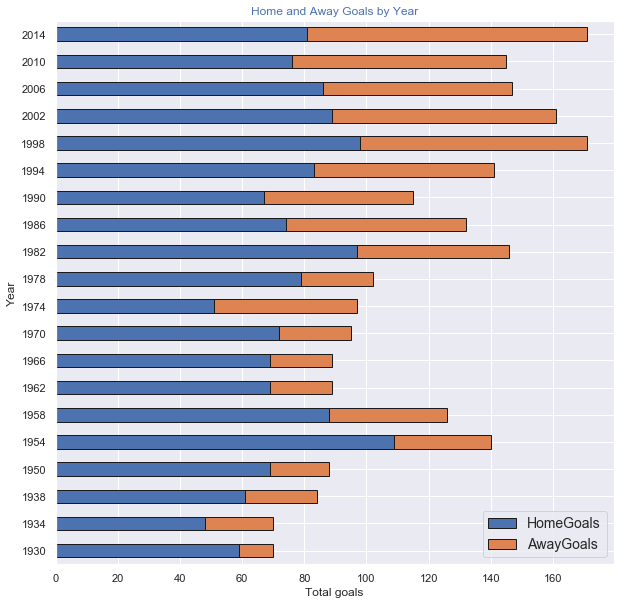

In [25]:
matches.groupby("Year").agg({"HomeGoals":"sum","AwayGoals":"sum"}).plot(kind="barh",
                                                                                 stacked=True,
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )
plt.title("Home and Away Goals by Year",color='b')
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total goals")
plt.grid(True)
plt.show()

In [27]:
#L.H.S = added a new column "TotalGoals"
matches["TotalGoals"] = matches.HomeGoals + matches.AwayGoals
total_goals=matches.groupby("Year").sum()
total_goals

,HomeGoals,AwayGoals,TotalGoals
Year,,,
1930,59,11,70
1934,48,22,70
1938,61,23,84
1950,69,19,88
1954,109,31,140
1958,88,38,126
1962,69,20,89
1966,69,20,89
1970,72,23,95


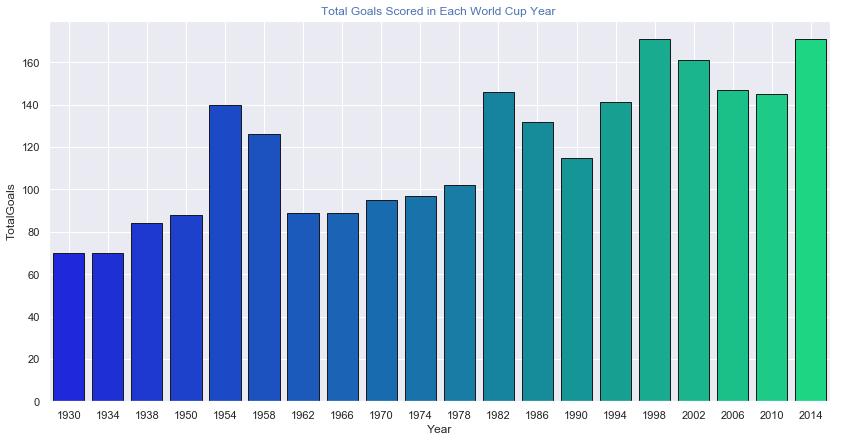

In [28]:
total_goals = matches.groupby("Year")["TotalGoals"].sum().reset_index()
plt.figure(figsize=(14,7))
sns.barplot(total_goals["Year"],total_goals["TotalGoals"],palette="winter",linewidth=1,edgecolor="k"*len(total_goals))

plt.title("Total Goals Scored in Each World Cup Year ",color='b')
plt.grid(True)
plt.show()

### 3.  All teams who have reached finals and how many times

In [29]:
finals = matches[matches["Round"] == "Final"][["HomeTeam","AwayTeam"]]
final_team = finals.replace("Germany FR","Germany")

In [30]:
final_teams=final_team.apply(pd.value_counts).fillna(0)
final_teams

,HomeTeam,AwayTeam
Argentina,2.0,3.0
Brazil,5.0,1.0
Czechoslovakia,0.0,2.0
England,1.0,0.0
France,0.0,2.0
Germany,4.0,4.0
Hungary,0.0,2.0
Italy,4.0,2.0
Netherlands,2.0,1.0
Spain,0.0,1.0


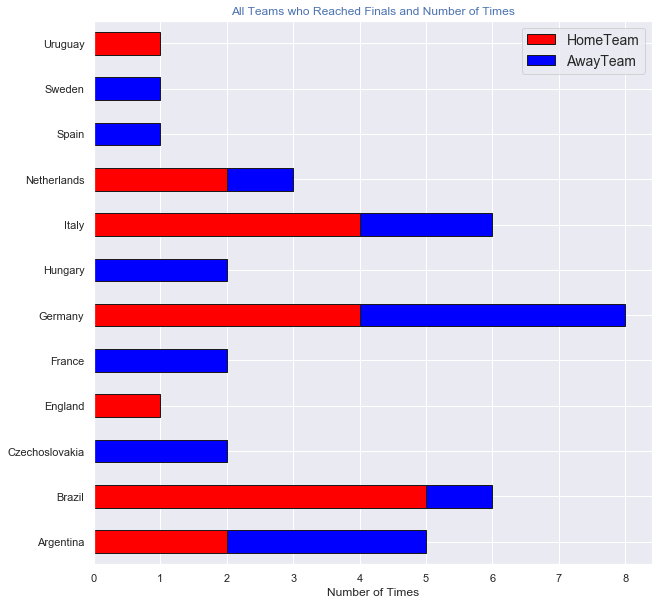

In [31]:
final_teams.plot(kind="barh", figsize = (10,10), stacked=True,edgecolor = "k",linewidth =1,color= ("red","blue"))
plt.title("All Teams who Reached Finals and Number of Times",color='b')
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Number of Times")
plt.grid(True)
plt.show()

### Top countries in the finals

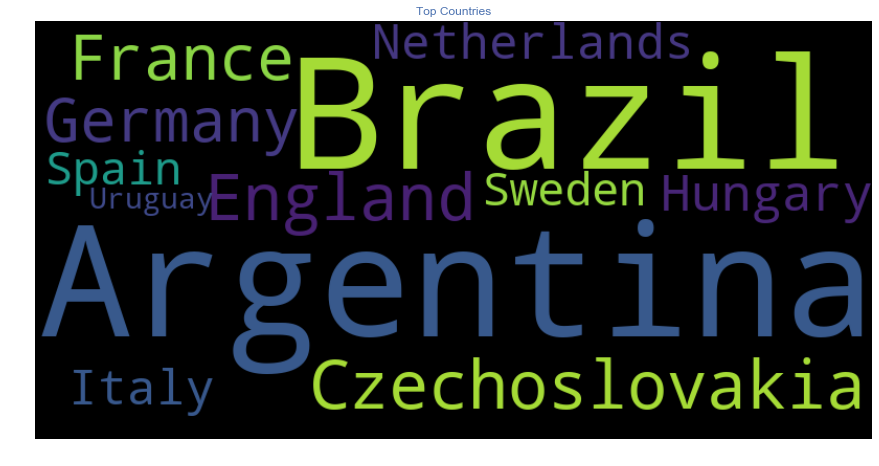

In [32]:
from wordcloud import WordCloud
import nltk
top_teams = final_teams.index

wc = WordCloud(background_color="black",scale=2).generate(" ".join(top_teams))
fig = plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Top Countries",color='b')
plt.show()


### 4. All teams who have reached semifinals and how many times 

In [33]:
semis = matches[matches["Round"] == "Semi-finals"][["HomeTeam","AwayTeam"]]
semi_final = semis.replace("Germany FR","Germany")


In [34]:
semi_finals=semi_final.apply(pd.value_counts).fillna(0)
semi_finals

,HomeTeam,AwayTeam
Argentina,2.0,2.0
Austria,0.0,2.0
Belgium,0.0,1.0
Brazil,6.0,2.0
Bulgaria,1.0,0.0
Chile,0.0,1.0
Croatia,0.0,1.0
Czechoslovakia,2.0,0.0
England,1.0,1.0
France,2.0,3.0


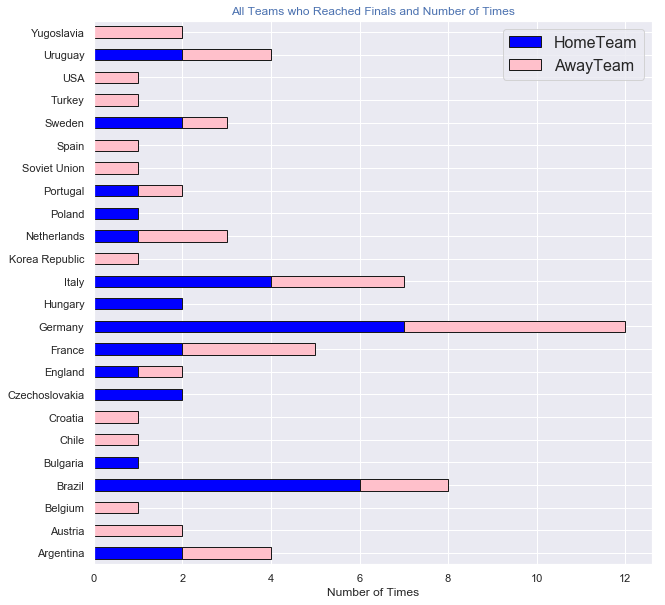

In [36]:
semi_finals.plot(kind="barh", figsize = (10,10),stacked=True,edgecolor = "k",linewidth =1,color= ("blue","pink"))
plt.title("All Teams who Reached Finals and Number of Times",color='b')
plt.legend(loc = "best" , prop = {"size" : 16})
plt.xlabel("Number of Times")
plt.grid(True)
plt.show()

### 5. How many goals and average goals scored in all semi_finals

In [21]:
semis_sum = matches[matches["Round"] == "Semi-finals"]["TotalGoals"].sum()
print(f"Total goals scored in the semi-finals = {semis_sum}")

semis_avg = matches[matches["Round"] == "Semi-finals"]["TotalGoals"].mean()
print(f"Average number of goals scored in the semi-finals = {semis_avg}")

Total goals scored in the semi-finals = 123
Average number of goals scored in the semi-finals = 3.6176470588235294


### 6. How many goals and average goals scored in all quarter_finals

In [22]:
quarter_sum = matches[matches["Round"] == "Quarter-finals"]["TotalGoals"].sum()
print(f"Total goals scored in the Quarter-finals = {quarter_sum}")

quarter_avg = matches[matches["Round"] == "Quarter-finals"]["TotalGoals"].mean()
print(f"Average number of goals scored in the Quarter-finals = {quarter_avg}")

Total goals scored in the Quarter-finals = 175
Average number of goals scored in the Quarter-finals = 2.8225806451612905


### 7. How many goals and average goals scored in all finals

In [23]:
finals_sum = matches[matches["Round"] == "Final"]["TotalGoals"].sum()
print(f"Total goals scored in the finals = {finals_sum}")

finals_avg = matches[matches["Round"] == "Final"]["TotalGoals"].mean()
print(f"Average number of goals scored in the finals = {finals_avg}")

Total goals scored in the finals = 68
Average number of goals scored in the finals = 3.5789473684210527


### 8. How many matches were played outside Quarter-finals and above

In [24]:
matches["Round"].unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semi-finals', 'Final',
       'Preliminary round', 'Quarter-finals', 'Match for third place',
       'First round', 'Group 6', 'Group B', 'Group A', 'Group 5',
       'Group C', 'Group D', 'Group F', 'Group E', 'Round of 16',
       'Group H', 'Group G', 'Third place', 'Play-off for third place'],
      dtype=object)

In [25]:
Rounds = ['Group 1','Group 2','Group 3','Group 4','Group 5','Group 6','First round','Round of 16',
          'Preliminary round','Group A','Group B','Group C','Group D','Group E','Group F','Group G','Group H']

In [26]:
outside_quarter_finals_above = matches["Round"].isin(Rounds)
matches[outside_quarter_finals_above].shape[0]

703

### 9. Create a new column for the outcome of every match(D = Draw,A = AwayTeam wins,H = HomeTeam wins)

In [27]:
def outcomes(matches):
    if matches["HomeGoals"] > matches["AwayGoals"]:
        return "H"
    if matches["AwayGoals"] > matches["HomeGoals"]:
        return "A"
    if matches["HomeGoals"] == matches["AwayGoals"]:
        return "D"

In [28]:
matches["outcome"] = matches.apply(outcomes,axis=1)

In [29]:
match_outcome = matches["outcome"].value_counts()
match_outcome

H    479
D    186
A    171
Name: outcome, dtype: int64

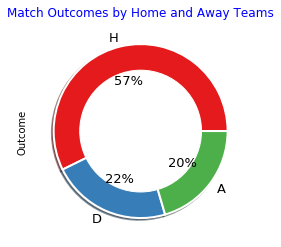

In [30]:
match_outcome.plot.pie(autopct="%1.0f%%",fontsize =13,
                                           colors = sns.color_palette("Set1"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Match Outcomes by Home and Away Teams",color='b')
plt.ylabel("Outcome")
plt.show()

### 10. Create a new column for the winner of every match(D = Draw if no winner)

In [31]:
def winner(matches):
    if matches["HomeGoals"] > matches["AwayGoals"]:
        return matches["HomeTeam"]
    if matches["AwayGoals"] > matches["HomeGoals"]:
        return matches["AwayTeam"]
    if matches["HomeGoals"] == matches["AwayGoals"]:
        return "Draw"

In [32]:
matches["winner"] = matches.apply(winner,axis=1)


In [33]:
matches.head()

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,TotalGoals,outcome,winner
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,5,H,France
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,3,H,USA
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,3,H,Yugoslavia
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,4,H,Romania
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,1,H,Argentina
